<a href="https://colab.research.google.com/github/sarang-manohar/hogwarts/blob/main/Sarang_Manohar_Data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Data Dictionary for Market Segmentation:

1.    spending: Amount spent by the customer per month (in 1000s)
2.    advance_payments: Amount paid by the customer in advance by cash (in 100s)
3.   probability_of_full_payment: Probability of payment done in full by the customer to the bank
4.    current_balance: Balance amount left in the account to make purchases (in 1000s)
5.    credit_limit: Limit of the amount in credit card (10000s)
6.    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7.    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)


In [2]:
rd = pd.read_csv(r'bank_marketing_part1_Data.csv')

rd.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [4]:
rd.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [5]:
rd.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

Normality test for spending
Statitics = 0.933, p value = 0.000


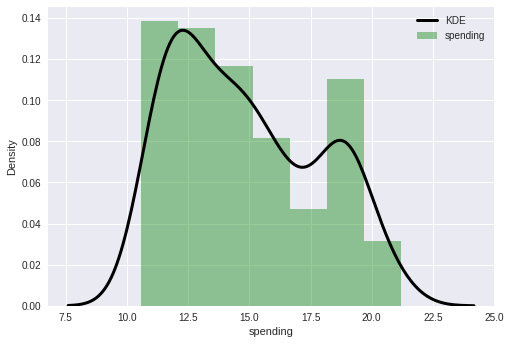

spending is not normally distributed.

Normality test for advance_payments
Statitics = 0.936, p value = 0.000


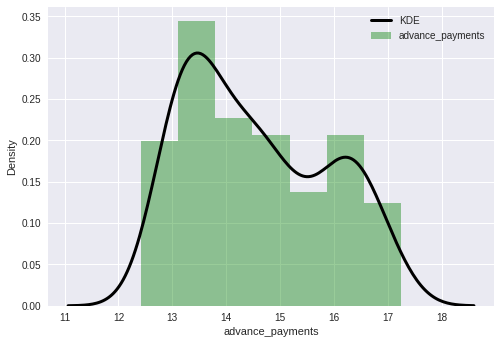

advance_payments is not normally distributed.

Normality test for probability_of_full_payment
Statitics = 0.973, p value = 0.000


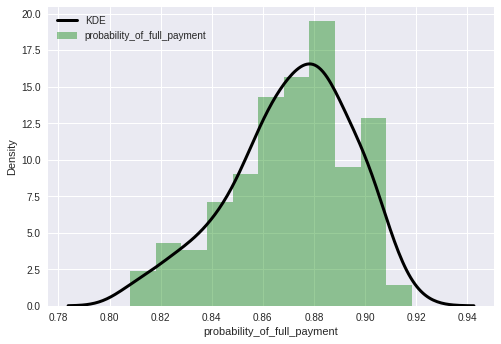

probability_of_full_payment is not normally distributed.

Normality test for current_balance
Statitics = 0.944, p value = 0.000


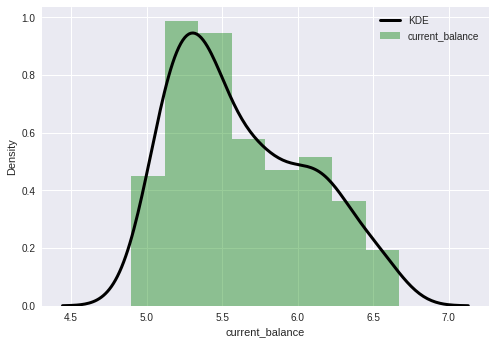

current_balance is not normally distributed.

Normality test for credit_limit
Statitics = 0.961, p value = 0.000


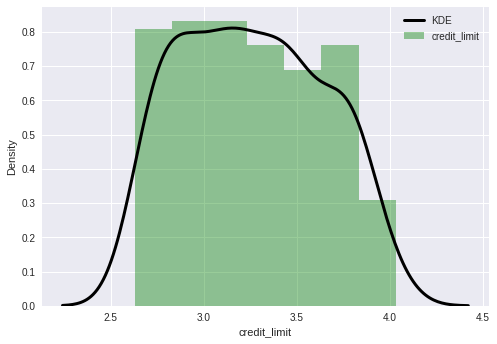

credit_limit is not normally distributed.

Normality test for min_payment_amt
Statitics = 0.984, p value = 0.015


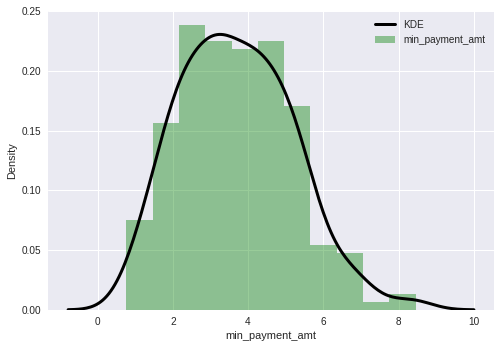

min_payment_amt is not normally distributed.

Normality test for max_spent_in_single_shopping
Statitics = 0.925, p value = 0.000


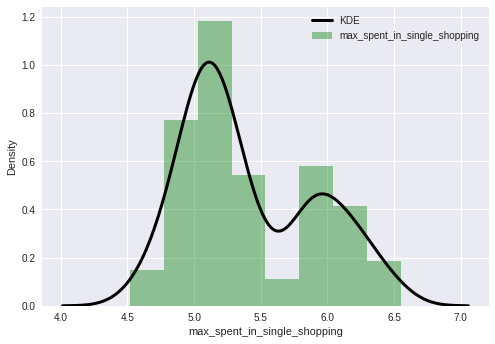

max_spent_in_single_shopping is not normally distributed.



In [64]:
from scipy.stats import shapiro as shapiro

for feature in rd.columns:
    stats, p_val = shapiro(rd[feature])
    print('Normality test for', feature)
    print('Statitics = %.3f, p value = %.3f' % (stats, p_val))
    sns.distplot(rd[feature],hist_kws = {'color':'g', 'label':feature},kde_kws={"color":'k',"lw": 3, "label": "KDE"})
    plt.legend()
    plt.show()
    if p_val > 0.05:
        print(feature, 'is normally distribution and has Gaussian curve.\n')
    else:
        print(feature, 'is not normally distributed.\n')

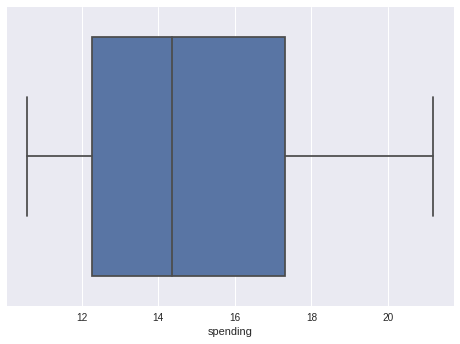

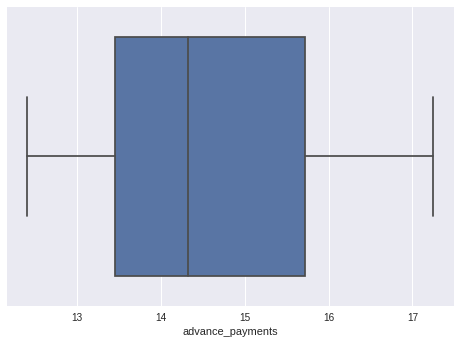

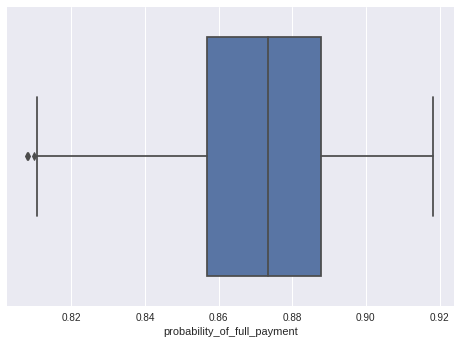

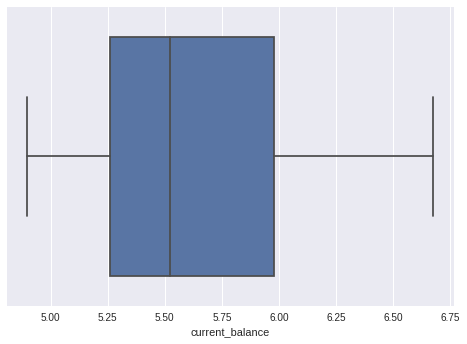

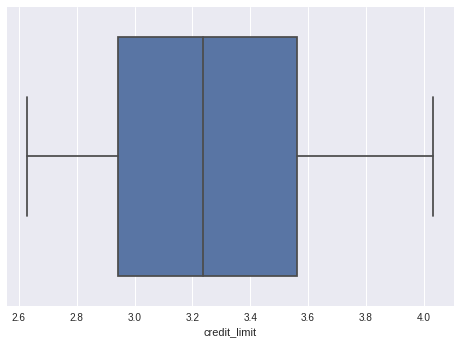

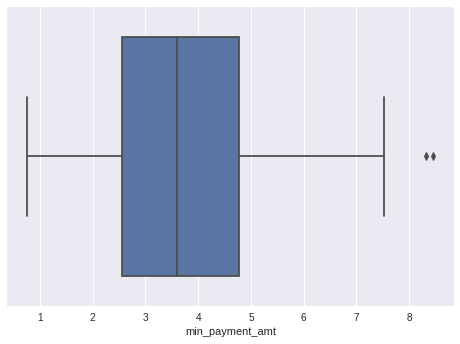

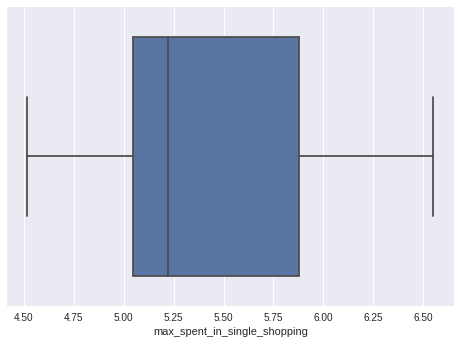

In [67]:
for feature in rd.columns:
    sns.boxplot(rd[feature])
    plt.show()

**Observations based on Univariate analysis of the data**

1. There are 210 records(observations) in the data
2. There are 7 independent features and all of them are non-NULL values
3. The data type of the all the features is **float** which is consistent with the explainations provided in the data dictionary
4. None of the features are normally distributed. This can be asserted via following test results

 * Shapiro-Wilk test
 * Distribution curve
 * Skewness stats

5. Except for a couple of data points for **min_payment_amt**, none of the features has any outlier data points